Product Review Project

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use a pipeline as a high-level helper
#from transformers import pipeline

#pipe = pipeline("fill-mask", model="distilbert/distilbert-base-uncased")

In [14]:
data01 = pd.read_csv('1429_1.csv')
data01['reviews.date'].head()
#data01.isnull().values.any()
#data01.isna().sum()
#(data01.isnull().mean() * 100).round(2)
#data01[data01.duplicated(keep=False)]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2704\3001684530.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data01 = pd.read_csv('1429_1.csv')


0    2017-01-13T00:00:00.000Z
1    2017-01-13T00:00:00.000Z
2    2017-01-13T00:00:00.000Z
3    2017-01-13T00:00:00.000Z
4    2017-01-12T00:00:00.000Z
Name: reviews.date, dtype: object

In [3]:
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
#data01.head(1)

In [5]:
data01["brand"].unique()

array(['Amazon', 'Amazon Fire', 'Amazon Echo', 'Amazon Coco T',
       'Amazon Fire Tv', 'Amazon Digital Services Inc.'], dtype=object)

In [6]:
data01["manufacturer"].unique()

array(['Amazon', 'Amazon Digital Services, Inc'], dtype=object)

In [8]:
data01["categories"].nunique()

41

In [9]:
data01["reviews.doRecommend"].unique()

array([True, False, nan], dtype=object)

In [10]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("distilbert/distilbert-base-uncased")

ModuleNotFoundError: No module named 'transformers'

In [4]:
data02 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data03 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
print("Data01 shape:", data01.shape)
print("Data02 shape:", data02.shape)
print("Data03 shape:", data03.shape)

Data01 shape: (34660, 21)
Data02 shape: (5000, 24)
Data03 shape: (28332, 24)


In [15]:
# fetching the intented Features

data1 = data01[['id' , 'name', 'brand', 'reviews.date', 'categories', 'reviews.rating', 'reviews.text', 'reviews.title']]
data2 = data02[['id' , 'name', 'brand', 'reviews.date', 'categories', 'reviews.rating', 'reviews.text', 'reviews.title']]
data3 = data03[['id' , 'name', 'brand', 'reviews.date', 'categories', 'reviews.rating', 'reviews.text', 'reviews.title']]


# Concatenate vertically
comb_data = pd.concat([data1, data2, data3], ignore_index=True)

# Save to new CSV
comb_data.to_csv('comb_data.csv', index=False)

# Remove duplicate rows
comb_data = comb_data.drop_duplicates()

print("=== DATA TYPES ===")
print(comb_data.dtypes)
print("\n=== MISSING VALUES ===")
print(comb_data.isnull().sum())
comb_data.info()


=== DATA TYPES ===
id                 object
name               object
brand              object
reviews.date       object
categories         object
reviews.rating    float64
reviews.text       object
reviews.title      object
dtype: object

=== MISSING VALUES ===
id                   0
name              6760
brand                0
reviews.date        39
categories           0
reviews.rating      33
reviews.text         1
reviews.title       19
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 66634 entries, 0 to 67991
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66634 non-null  object 
 1   name            59874 non-null  object 
 2   brand           66634 non-null  object 
 3   reviews.date    66595 non-null  object 
 4   categories      66634 non-null  object 
 5   reviews.rating  66601 non-null  float64
 6   reviews.text    66633 non-null  object 
 7   reviews.title   66615 non

In [11]:
import os
print(os.getcwd())


c:\Users\Usuario\Desktop\IA\CURSO\WEEK_6\PROJECT\ProductReviewProjectG2


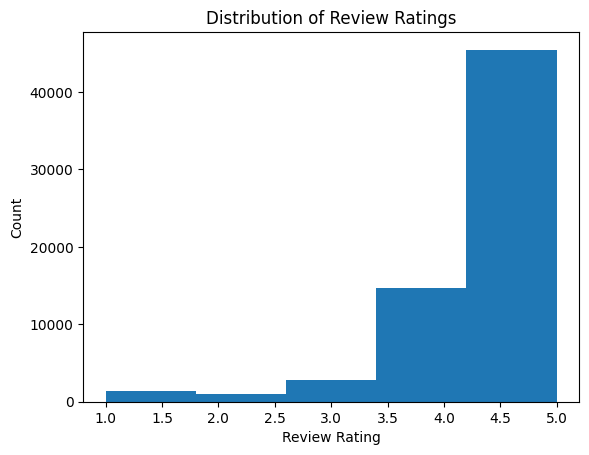

In [7]:
## Plotting the distribution of review ratings
plt.figure()
plt.hist(comb_data["reviews.rating"].dropna(), bins=5)
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.title("Distribution of Review Ratings")
plt.show()